## HHI OF+PF

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [28]:
%cd
HHI_Phy_DF = pd.read_csv('MHHRI/Affectiva/HHI_Affectiva_Recordings/HHI_Physiological_Feature_Vectors.csv')
HHI_OF_DF=pd.read_csv('MHHRI/Ego/HHI_Ego_Recordings_Part1/FinalFile/HHI_OpenFace_Feature_Vectors_clean.csv')
print(HHI_Phy_DF.shape,HHI_OF_DF.shape)

/home/ubuntu
(276, 31) (220, 187)


In [29]:
list_phy_cols = ['phy_feature_' + str(i) for i in range(1, 31)]
list_b5_t = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']

In [30]:
list_ego_cols = ['OF_feature_' + str(i) for i in range(1, 187)]

In [31]:
Big_5_weighted = pd.read_csv('MHHRI/Self_Assessment_Personality/Self_Assessment_Big5_Traits.csv')
Big_5_weighted.tail()

,user,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
13,U014,5.0,5.5,6.0,3.5,6.5
14,U015,6.5,6.0,7.5,5.5,7.5
15,U016,5.0,8.0,6.0,7.0,3.0
16,U017,7.0,8.0,8.0,3.5,6.0
17,U018,9.5,6.5,6.0,1.0,4.5


In [32]:
Big_5_weighted_categorised = Big_5_weighted
Big_5_weighted_categorised.tail()

,user,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
13,U014,5.0,5.5,6.0,3.5,6.5
14,U015,6.5,6.0,7.5,5.5,7.5
15,U016,5.0,8.0,6.0,7.0,3.0
16,U017,7.0,8.0,8.0,3.5,6.0
17,U018,9.5,6.5,6.0,1.0,4.5


In [33]:
Big_5_weighted_binarised = Big_5_weighted_categorised
Big_5_weighted_binarised[list_b5_t] = (Big_5_weighted_categorised[list_b5_t] >= Big_5_weighted_categorised[list_b5_t].mean()).astype(int)
Big_5_weighted_binarised.head()

,user,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
0,U001,1,1,1,0,0
1,U002,1,1,0,0,0
2,U003,1,0,1,0,1
3,U004,1,1,1,0,1
4,U005,0,0,0,1,0


In [34]:
HHI_Phy_Big5 = HHI_Phy_DF.merge(Big_5_weighted_binarised, left_on = 'user', right_on = 'user')
HHI_Phy_Big5.tail(60)

,user,phy_feature_1,phy_feature_2,phy_feature_3,phy_feature_4,phy_feature_5,phy_feature_6,phy_feature_7,phy_feature_8,phy_feature_9,...,phy_feature_26,phy_feature_27,phy_feature_28,phy_feature_29,phy_feature_30,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
216,U007,-1.11,1.07,-0.181340,0.216476,7.250880e-06,-1.450176e-05,-3.45,1.42,-0.959838,...,0.184,0.173996,0.003578,-6.215040e-07,6.215040e-07,1,1,0,0,1
217,U007,-0.65,0.30,-0.132584,0.155215,-1.262626e-05,1.168164e-20,-1.32,-0.25,-0.857386,...,0.204,0.191179,0.004064,-3.367003e-06,0.000000e+00,1,1,0,0,1
218,U007,-0.25,0.56,0.291979,0.137931,1.510574e-05,9.433542e-20,0.36,2.81,0.969048,...,0.074,0.070063,0.000594,0.000000e+00,0.000000e+00,1,1,0,0,1
219,U007,-0.41,1.03,0.024738,0.408775,4.956629e-05,8.261049e-06,-1.94,0.06,-0.767893,...,0.179,0.158474,0.007019,1.032631e-05,-3.097893e-07,1,1,0,0,1
220,U007,-1.03,1.28,-0.028549,0.257110,1.608413e-04,8.506032e-06,-0.28,2.42,0.816152,...,0.316,0.190328,0.024586,-2.536344e-05,-2.319827e-07,1,1,0,0,1
221,U007,-0.81,0.60,0.231278,0.106247,5.979073e-05,1.307922e-05,-0.08,2.50,0.933378,...,1.066,0.895482,0.109535,2.354260e-04,0.000000e+00,1,1,0,0,1
222,U007,-0.22,0.86,0.545343,0.380714,5.192630e-04,-1.535455e-05,-1.28,-0.53,-0.760798,...,0.181,0.171843,0.005004,-4.187605e-06,-1.954216e-06,1,1,0,0,1
223,U007,-0.29,0.24,-0.121858,0.068955,6.124949e-06,-5.104124e-06,-1.65,-0.49,-0.921650,...,0.189,0.178621,0.002748,-3.062474e-06,-5.104124e-07,1,1,0,0,1
224,U007,0.16,0.35,0.249544,0.020526,0.000000e+00,0.000000e+00,0.88,1.09,0.989893,...,0.996,0.903275,0.049516,-1.550492e-04,6.255585e-06,1,1,0,0,1
225,U007,-0.54,0.85,-0.009237,0.372080,-4.963235e-04,-1.148897e-06,-2.85,0.11,-0.918189,...,0.186,0.176176,0.004774,4.825368e-06,-6.893382e-07,1,1,0,0,1


In [35]:
HHI_OF_Big5 = HHI_OF_DF.merge(Big_5_weighted_binarised, left_on = 'user', right_on = 'user')
HHI_OF_Big5.tail(60)

,user,OF_feature_1,OF_feature_2,OF_feature_3,OF_feature_4,OF_feature_5,OF_feature_6,OF_feature_7,OF_feature_8,OF_feature_9,...,OF_feature_182,OF_feature_183,OF_feature_184,OF_feature_185,OF_feature_186,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
160,U007,-0.669,0.332,-0.173409,0.205240,3.530000e-05,4.980000e-06,-0.233,0.683,0.280363,...,2.61,0.251609,0.421829,-0.000071,0.000057,1,1,0,0,1
161,U007,-0.297,0.794,0.064908,0.163959,-3.020000e-06,-2.440000e-06,-0.027,0.807,0.274043,...,1.41,0.175129,0.273653,0.000005,-0.000012,1,1,0,0,1
162,U007,-2.416,0.012,-0.274588,0.228012,-5.140000e-05,-3.840000e-06,-2.389,0.684,0.337568,...,1.16,0.089440,0.186969,0.000000,0.000000,1,1,0,0,1
163,U007,-2.339,0.570,-0.096104,0.165141,0.000000e+00,0.000000e+00,-0.063,1.990,0.206322,...,1.10,0.077969,0.175133,0.000000,0.000000,1,1,0,0,1
164,U013,-0.375,0.401,0.035832,0.087802,3.670000e-06,-1.840000e-06,-0.323,0.560,0.119928,...,1.86,0.181393,0.298173,-0.000302,-0.000184,0,0,1,1,0
165,U013,-0.239,0.521,0.102861,0.086726,-1.110000e-06,4.020000e-06,-0.264,0.756,0.140647,...,1.90,0.198397,0.334498,0.000264,-0.000029,0,0,1,1,0
166,U013,-0.477,0.532,0.069130,0.083860,8.480000e-07,-1.310000e-05,-0.311,0.676,0.169735,...,2.48,0.246692,0.429122,0.000005,-0.000014,0,0,1,1,0
167,U013,-0.512,0.562,0.089588,0.124059,-7.860000e-07,4.460000e-06,-0.194,0.565,0.129368,...,1.77,0.209607,0.336059,-0.000119,0.000101,0,0,1,1,0
168,U013,-0.922,1.287,0.108527,0.325997,-2.040000e-06,3.400000e-07,-0.138,1.003,0.444598,...,2.47,0.296848,0.482578,-0.000089,-0.000056,0,0,1,1,0
169,U013,-0.207,0.199,0.043105,0.061333,1.950000e-05,4.380000e-05,-0.295,0.665,0.174176,...,2.09,0.229316,0.373838,0.000055,-0.000103,0,0,1,1,0


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
HHI_Phy_Big5_final = HHI_Phy_Big5
HHI_Phy_Big5_final[list_phy_cols] = scaler.fit_transform(HHI_Phy_Big5[list_phy_cols])
HHI_OF_Big5_final = HHI_OF_Big5
HHI_OF_Big5_final[list_ego_cols] = scaler.fit_transform(HHI_OF_Big5[list_ego_cols])

In [38]:
HHI_Phy_Big5_final.head(10)

,user,phy_feature_1,phy_feature_2,phy_feature_3,phy_feature_4,phy_feature_5,phy_feature_6,phy_feature_7,phy_feature_8,phy_feature_9,...,phy_feature_26,phy_feature_27,phy_feature_28,phy_feature_29,phy_feature_30,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
0,U003,0.049692,0.761807,0.167967,0.144438,-0.333086,-0.074431,-0.599144,0.174640,-0.439540,...,-0.555968,-0.536929,-0.576451,-0.216956,-0.086930,1,0,1,0,1
1,U003,0.099293,-0.308088,-0.293677,-0.494205,-0.302402,-0.162075,-0.589844,-0.419659,-0.649175,...,-0.537940,-0.521880,-0.401135,-0.094615,-0.086930,1,0,1,0,1
2,U003,-0.074313,1.199492,0.275337,-0.354649,0.092490,-0.120940,-0.134117,-0.655329,-0.625211,...,-0.412920,-0.481622,0.412150,0.046193,-0.098304,1,0,1,0,1
3,U003,0.595310,0.105280,-0.342699,-0.794101,-0.034005,-0.079548,-0.189920,-0.778288,-0.770276,...,-0.530493,-0.518591,-0.460788,-0.187448,-0.046052,1,0,1,0,1
4,U003,0.496107,-1.450931,-0.760922,-1.098088,-0.033018,-0.099917,0.042594,-0.737302,-0.678761,...,-0.530493,-0.515957,-0.542706,-0.216520,-0.097837,1,0,1,0,1
5,U003,0.967323,0.761807,1.009185,-0.102733,-0.448954,-0.124550,-0.589844,0.205380,-0.639219,...,-0.374904,-0.370754,-0.210332,-0.481981,-0.108379,1,0,1,0,1
6,U003,0.694513,-1.183457,-0.412789,-1.071222,-0.006348,-0.170241,0.005392,-1.065191,-0.772045,...,-0.527358,-0.508106,-0.571996,-0.209875,-0.101840,1,0,1,0,1
7,U003,0.719314,1.053597,0.430475,0.866598,0.139920,-0.005656,0.061195,-0.122509,-0.371460,...,-0.556359,-0.537371,-0.577953,-0.219298,-0.086930,1,0,1,0,1
8,U003,-0.892740,1.199492,0.351421,-0.093272,-0.522630,-0.074431,-1.678009,-0.501631,-0.301885,...,-0.554008,-0.537366,-0.539737,-0.187948,-0.116452,1,0,1,0,1
9,U003,-0.099113,-0.624194,-0.390757,-0.725019,0.133268,-0.116166,0.023993,-0.880753,-0.755654,...,-0.538723,-0.521720,-0.536747,-0.241132,-0.229824,1,0,1,0,1


In [39]:
HHI_OF_Big5_final.head(10)

,user,OF_feature_1,OF_feature_2,OF_feature_3,OF_feature_4,OF_feature_5,OF_feature_6,OF_feature_7,OF_feature_8,OF_feature_9,...,OF_feature_182,OF_feature_183,OF_feature_184,OF_feature_185,OF_feature_186,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
0,U001,0.679719,-1.084652,-0.278403,-1.159977,0.474226,0.012067,0.545417,-0.395324,1.802605,...,0.489139,0.053697,-0.045127,0.089690,-0.479761,1,1,1,0,0
1,U001,-0.493327,0.425623,-0.680596,0.078706,-0.430240,-0.186629,-0.363664,0.021613,-2.001115,...,-0.427950,-0.160561,-0.386225,-0.672058,-1.583406,1,1,1,0,0
2,U001,1.233518,0.489890,1.460528,-0.303703,0.269889,0.055939,-0.314714,-1.519789,-1.575843,...,-0.018535,0.802335,0.739134,0.267065,-0.737112,1,1,1,0,0
3,U001,0.722513,-0.690286,-0.406339,-0.850483,0.197025,-0.012841,0.545417,0.164803,1.540860,...,-0.919248,0.058910,-0.249990,-0.047913,0.229903,1,1,1,0,0
4,U001,-1.341646,-1.140156,-0.417720,-0.369487,0.083769,0.039805,0.419544,0.493298,-0.821642,...,-0.362444,-1.134876,-0.735167,-0.047913,0.229903,1,1,1,0,0
5,U001,0.229129,-1.096337,-0.324311,-0.958010,-0.473009,0.135049,0.202763,-1.662979,-1.840826,...,1.815643,0.264290,0.411256,-0.819629,-1.782268,1,1,1,0,0
6,U001,0.679719,-1.084652,-0.278403,-1.159977,0.474226,0.012067,0.545417,-0.395324,1.802605,...,0.489139,0.053697,-0.045127,0.089690,-0.479761,1,1,1,0,0
7,U001,-0.201324,0.413938,-0.328294,0.339100,-4.537594,-0.025578,0.041926,-1.267100,-1.881347,...,-0.608093,0.291485,0.134023,2.066207,-0.405906,1,1,1,0,0
8,U001,-0.095599,1.637933,-0.185738,0.117671,0.083769,1.058759,-0.370657,-0.054194,-0.039621,...,1.766514,0.189538,1.150546,-0.256365,-0.920747,1,1,1,0,0
9,U001,0.679719,-1.084652,-0.278403,-1.159977,0.474226,0.012067,0.545417,-0.395324,1.802605,...,0.489139,0.053697,-0.045127,0.089690,-0.479761,1,1,1,0,0


## Extraversion 

### Phy

In [40]:
X_Phy = HHI_Phy_Big5_final[list_phy_cols].to_numpy()
Y_Phy = HHI_Phy_Big5_final['Extraversion'].to_numpy()

In [41]:
X_train_Phy, X_test_Phy, Y_train_Phy, Y_test_Phy = train_test_split(X_Phy, Y_Phy, test_size=0.13, shuffle=False)

In [42]:
clf = SVC()
clf.fit(X_train_Phy, Y_train_Phy)
clf.score(X_test_Phy, Y_test_Phy)

0.5555555555555556

In [43]:
Y_preds_Phy = clf.predict(X_test_Phy)
print(classification_report(Y_test_Phy, Y_preds_Phy))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.56      0.71        36

    accuracy                           0.56        36
   macro avg       0.50      0.28      0.36        36
weighted avg       1.00      0.56      0.71        36



/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
scores_Phy = cross_val_score(clf, X_Phy, Y_Phy, cv=18)
print(scores_Phy)
print(np.mean(scores_Phy))

[0.75       0.75       0.8125     0.6875     0.8125     0.625
 0.66666667 0.66666667 0.66666667 0.6        0.93333333 0.86666667
 0.8        0.93333333 1.         0.86666667 1.         1.        ]
0.8020833333333334


### OF

In [45]:
X_OF = HHI_OF_Big5_final[list_ego_cols].to_numpy()
Y_OF = HHI_OF_Big5_final['Extraversion'].to_numpy()

In [46]:
X_train_OF, X_test_OF, Y_train_OF, Y_test_OF = train_test_split(X_OF, Y_OF, test_size=0.13, shuffle=False)

In [47]:
clf2 = SVC(kernel='linear')
clf2.fit(X_train_OF, Y_train_OF)
clf2.score(X_test_OF, Y_test_OF)

0.2413793103448276

In [48]:
Y_preds_OF = clf2.predict(X_test_OF)
print(classification_report(Y_test_OF, Y_preds_OF))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.24      1.00      0.39         7

    accuracy                           0.24        29
   macro avg       0.12      0.50      0.19        29
weighted avg       0.06      0.24      0.09        29



/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
scores_OF = cross_val_score(clf2, X_OF, Y_OF, cv=18)
print(scores_OF)
print(np.mean(scores_OF))

[0.76923077 0.84615385 0.92307692 0.84615385 0.91666667 1.
 0.83333333 0.66666667 0.66666667 0.75       1.         0.83333333
 0.75       0.75       0.83333333 0.75       0.66666667 0.83333333]
0.813034188034188


In [24]:
# from matplotlib import pyplot as plt

# def f_importances(coef, names):
#     imp = coef
#     imp,names = zip(*sorted(zip(imp,names)))
#     plt.barh(range(len(names)), imp, align='center')
#     plt.yticks(range(len(names)), names)
#     plt.show()

# features_names = list_ego_cols
# # svm = svm.SVC(kernel='linear')
# # svm.fit(X, Y)
# f_importances(clf2.coef_, features_names)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [51]:
# rf = RandomForestClassifier()
# rf.fit(X_train_OF, Y_train_OF)
# print(rf.feature_importances_)
# importances = rf.feature_importances_
# indices = np.argsort(importances)[-10:]
# features = list_ego_cols
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

### Ensmble

In [52]:
alpha = 0.1
Y_final =[]
for i in range(len(Y_preds_OF)):
    Y_final.append(int(alpha*Y_preds_OF[i] + (1-alpha)*Y_preds_Phy[i]))
#     Y_final.append(int(Y_preds_OF[i] and Y_preds_Phy[i] ))
Y_final

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [53]:
from sklearn.metrics import f1_score

In [54]:
f1_score(Y_test_OF, Y_final)

0.1

In [55]:
Y_preds_OF, Y_preds_Phy

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

## Openness

In [56]:
X_OF = HHI_OF_Big5_final[list_ego_cols].to_numpy()
Y_OF = HHI_OF_Big5_final['Openness'].to_numpy()
X_Phy = HHI_Phy_Big5_final[list_phy_cols].to_numpy()
Y_Phy = HHI_Phy_Big5_final['Openness'].to_numpy()

In [57]:
X_train_Phy, X_test_Phy, Y_train_Phy, Y_test_Phy = train_test_split(X_Phy, Y_Phy, test_size=0.23, shuffle=False)
X_train_OF, X_test_OF, Y_train_OF, Y_test_OF = train_test_split(X_OF, Y_OF, test_size=0.23, shuffle=False)

In [58]:
clf = SVC()
clf.fit(X_train_Phy, Y_train_Phy)
clf.score(X_test_Phy, Y_test_Phy)

0.890625

In [59]:
Y_preds_Phy = clf.predict(X_test_Phy)
print(classification_report(Y_test_Phy, Y_preds_Phy))
scores_Phy = cross_val_score(clf, X_Phy, Y_Phy, cv=18)
print(scores_Phy)
print(np.mean(scores_Phy))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        24
           1       1.00      0.82      0.90        40

    accuracy                           0.89        64
   macro avg       0.89      0.91      0.89        64
weighted avg       0.92      0.89      0.89        64

[0.875      0.9375     0.875      0.75       0.875      0.5625
 0.53333333 0.46666667 0.53333333 0.6        0.8        1.
 0.93333333 0.86666667 0.73333333 1.         1.         1.        ]
0.7967592592592593


[0.02250357 0.02541085 0.04373712 0.01358439 0.01057005 0.01202779
 0.0468357  0.02332544 0.05871084 0.01128877 0.00938248 0.01333909
 0.01796838 0.01596659 0.02580473 0.01450561 0.00854997 0.00804808
 0.04440053 0.04021366 0.08557404 0.0084065  0.00691603 0.00651745
 0.12802473 0.09910701 0.13930612 0.03980488 0.01463523 0.00553436]


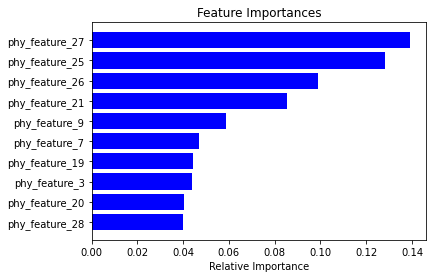

In [82]:
from matplotlib import pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train_Phy, Y_train_Phy)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
features = list_phy_cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [60]:
clf2 = SVC()
clf2.fit(X_train_OF, Y_train_OF)
clf2.score(X_test_OF, Y_test_OF)

0.6666666666666666

In [61]:
Y_preds_OF = clf2.predict(X_test_OF)
print(classification_report(Y_test_OF, Y_preds_OF))
scores_OF = cross_val_score(clf, X_OF, Y_OF, cv=18)
print(scores_OF)
print(np.mean(scores_OF))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        40
           1       0.20      0.18      0.19        11

    accuracy                           0.67        51
   macro avg       0.49      0.49      0.49        51
weighted avg       0.66      0.67      0.66        51

[0.84615385 0.84615385 0.92307692 0.61538462 1.         0.91666667
 0.91666667 0.75       0.83333333 1.         0.58333333 0.83333333
 0.83333333 1.         1.         0.75       0.5        0.75      ]
0.8276353276353277


[0.00064271 0.00403759 0.00533187 0.00816294 0.00152822 0.00981753
 0.00215692 0.00561625 0.00939792 0.00222842 0.00139374 0.00241213
 0.00090621 0.00260645 0.00243563 0.00078514 0.00050791 0.00438166
 0.00251861 0.0039134  0.00930713 0.00462825 0.00121548 0.00361035
 0.00171668 0.00493565 0.00983791 0.00214689 0.00270378 0.00467908
 0.0037854  0.00675895 0.00566603 0.00455359 0.00203267 0.00272827
 0.00816978 0.00239412 0.00563043 0.00556634 0.00271548 0.00326945
 0.00251909 0.00470811 0.00919266 0.00941783 0.00137944 0.00354692
 0.00997859 0.00349618 0.00797    0.00418712 0.00099752 0.00150095
 0.00116858 0.00794823 0.00406052 0.00504397 0.00197375 0.00453977
 0.00703742 0.00046347 0.00628527 0.0065884  0.0022228  0.00274676
 0.00401437 0.00167119 0.01068423 0.00261627 0.00107213 0.00343867
 0.00133131 0.00334986 0.00097151 0.00512542 0.00348493 0.00421127
 0.01262589 0.00778948 0.01271987 0.00448238 0.00070618 0.00243317
 0.         0.00770666 0.00627426 0.0107652  0.0025456  0.0047

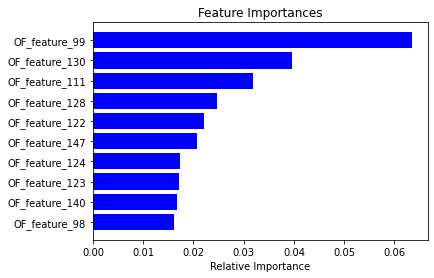

In [155]:
from matplotlib import pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train_OF, Y_train_OF)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
features = list_ego_cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [156]:
alpha = 0.1
Y_final =[]
for i in range(len(Y_preds_OF)):
    Y_final.append(int(alpha*Y_preds_OF[i] + (1-alpha)*Y_preds_Phy[i]))
#     Y_final.append(int(Y_preds_OF[i] and Y_preds_Phy[i] ))
f1_score(Y_test_OF, Y_final)

0.4761904761904762

## Agreeableness

In [ ]:
Agreeableness	Conscientiousness	Neuroticism	Openness

In [62]:
X_OF = HHI_OF_Big5_final[list_ego_cols].to_numpy()
Y_OF = HHI_OF_Big5_final['Agreeableness'].to_numpy()
X_Phy = HHI_Phy_Big5_final[list_phy_cols].to_numpy()
Y_Phy = HHI_Phy_Big5_final['Agreeableness'].to_numpy()

In [63]:
X_train_Phy, X_test_Phy, Y_train_Phy, Y_test_Phy = train_test_split(X_Phy, Y_Phy, test_size=0.13, shuffle=False)
X_train_OF, X_test_OF, Y_train_OF, Y_test_OF = train_test_split(X_OF, Y_OF, test_size=0.13, shuffle=False)

In [64]:
clf = SVC()
clf.fit(X_train_Phy, Y_train_Phy)
clf.score(X_test_Phy, Y_test_Phy)

0.3333333333333333

In [65]:
Y_preds_Phy = clf.predict(X_test_Phy)
print(classification_report(Y_test_Phy, Y_preds_Phy))
scores_Phy = cross_val_score(clf, X_Phy, Y_Phy, cv=18)
print(scores_Phy)
print(np.mean(scores_Phy))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50        12
           1       0.00      0.00      0.00        24

    accuracy                           0.33        36
   macro avg       0.17      0.50      0.25        36
weighted avg       0.11      0.33      0.17        36

[0.6875     0.8125     0.8125     0.6875     0.875      0.875
 0.26666667 0.6        0.66666667 0.93333333 0.93333333 0.73333333
 0.86666667 0.73333333 0.73333333 0.66666667 0.8        0.73333333]
0.7453703703703703


/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.02261028 0.02348194 0.04186081 0.01154141 0.00820975 0.00660258
 0.01850892 0.01560244 0.01928704 0.01417039 0.00802105 0.00844311
 0.02026937 0.02486013 0.04199899 0.01411038 0.0095729  0.00799844
 0.03390147 0.03492275 0.04133028 0.00679052 0.00567465 0.00553547
 0.10333259 0.17410688 0.16260687 0.07117163 0.03041469 0.01306229]


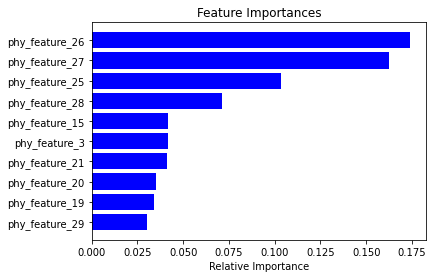

In [85]:
from matplotlib import pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train_Phy, Y_train_Phy)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
features = list_phy_cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [67]:
clf2 = SVC()
clf2.fit(X_train_OF, Y_train_OF)
clf2.score(X_test_OF, Y_test_OF)

0.27586206896551724

In [68]:
Y_preds_OF = clf2.predict(X_test_OF)
print(classification_report(Y_test_OF, Y_preds_OF))
scores_OF = cross_val_score(clf, X_OF, Y_OF, cv=18)
print(scores_OF)
print(np.mean(scores_OF))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09        22
           1       0.25      1.00      0.40         7

    accuracy                           0.28        29
   macro avg       0.62      0.52      0.24        29
weighted avg       0.82      0.28      0.16        29

[0.76923077 0.76923077 0.92307692 0.92307692 0.91666667 0.5
 0.66666667 0.75       0.83333333 0.83333333 0.83333333 1.
 0.91666667 0.83333333 0.58333333 0.58333333 0.58333333 0.58333333]
0.7667378917378919


[0.01145368 0.00540191 0.01786604 0.00586049 0.00131303 0.00194184
 0.01323768 0.01006726 0.01727655 0.00523876 0.00216383 0.00679899
 0.00023925 0.00385734 0.00548355 0.0047516  0.00731024 0.00341704
 0.00342014 0.00269071 0.00750345 0.00481325 0.00437117 0.00162418
 0.00468527 0.00089824 0.00413612 0.00426869 0.00565197 0.00526514
 0.01174194 0.00695907 0.01135553 0.0099179  0.01141592 0.00327042
 0.00987107 0.00839238 0.00870634 0.00471179 0.01463588 0.00466422
 0.00450636 0.00472701 0.0107481  0.01103461 0.01272857 0.00767488
 0.01552914 0.00469807 0.01262433 0.00644251 0.01034205 0.00172688
 0.00777841 0.00729359 0.0060295  0.00715801 0.0173568  0.01179543
 0.0088611  0.00804971 0.01121265 0.00430961 0.00769678 0.00214912
 0.00764907 0.00589297 0.00997025 0.01048337 0.01495704 0.0041339
 0.00440432 0.01222463 0.01271374 0.00689379 0.00630563 0.00452812
 0.00396471 0.0091189  0.01638088 0.008715   0.00505032 0.00348854
 0.         0.00503835 0.00558579 0.00605182 0.00119629 0.00142

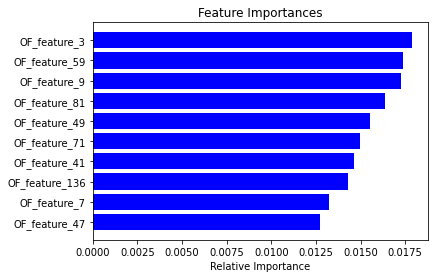

In [94]:
from matplotlib import pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train_OF, Y_train_OF)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
features = list_ego_cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [163]:
alpha = 0.5
Y_final =[]
for i in range(len(Y_preds_OF)):
    Y_final.append(int(alpha*Y_preds_OF[i] + (1-alpha)*Y_preds_Phy[i]))
#     Y_final.append(int(Y_preds_OF[i] and Y_preds_Phy[i] ))
f1_score(Y_test_OF, Y_final)

0.4324324324324324

##### Conscientiousness

In [98]:
Conscientiousness	Neuroticism

SyntaxError: invalid syntax (2251504506.py, line 1)

In [69]:
X_OF = HHI_OF_Big5_final[list_ego_cols].to_numpy()
Y_OF = HHI_OF_Big5_final['Conscientiousness'].to_numpy()
X_Phy = HHI_Phy_Big5_final[list_phy_cols].to_numpy()
Y_Phy = HHI_Phy_Big5_final['Conscientiousness'].to_numpy()

In [70]:
X_train_Phy, X_test_Phy, Y_train_Phy, Y_test_Phy = train_test_split(X_Phy, Y_Phy, test_size=0.13, shuffle=False)
X_train_OF, X_test_OF, Y_train_OF, Y_test_OF = train_test_split(X_OF, Y_OF, test_size=0.13, shuffle=False)

In [71]:
clf = SVC()
clf.fit(X_train_Phy, Y_train_Phy)
clf.score(X_test_Phy, Y_test_Phy)

0.3333333333333333

In [72]:
Y_preds_Phy = clf.predict(X_test_Phy)
print(classification_report(Y_test_Phy, Y_preds_Phy))
scores_Phy = cross_val_score(clf, X_Phy, Y_Phy, cv=18)
print(scores_Phy)
print(np.mean(scores_Phy))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50        12
           1       0.00      0.00      0.00        24

    accuracy                           0.33        36
   macro avg       0.17      0.50      0.25        36
weighted avg       0.11      0.33      0.17        36

[0.5        0.625      0.6875     0.4375     0.8125     1.
 0.86666667 0.86666667 0.93333333 0.73333333 0.86666667 0.93333333
 0.93333333 1.         0.93333333 0.86666667 0.86666667 0.86666667]
0.8182870370370371


/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.03453657 0.0672041  0.09434702 0.0125796  0.01055936 0.00818923
 0.03719633 0.01612274 0.04627247 0.01460195 0.01086515 0.00846885
 0.01559073 0.01443125 0.01438706 0.02004453 0.00782602 0.00542089
 0.03214926 0.02735642 0.06474004 0.01072045 0.00524044 0.00528064
 0.09517349 0.11245618 0.14595433 0.04670526 0.00825039 0.00732926]


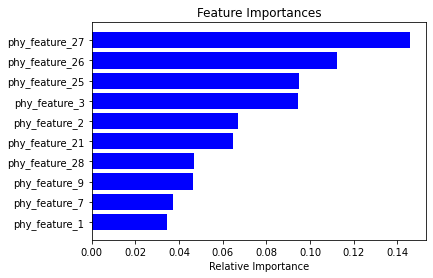

In [137]:
from matplotlib import pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train_Phy, Y_train_Phy)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
features = list_phy_cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [73]:
clf2 = SVC()
clf2.fit(X_train_OF, Y_train_OF)
clf2.score(X_test_OF, Y_test_OF)

0.5862068965517241

In [74]:
Y_preds_OF = clf2.predict(X_test_OF)
print(classification_report(Y_test_OF, Y_preds_OF))
scores_OF = cross_val_score(clf, X_OF, Y_OF, cv=18)
print(scores_OF)
print(np.mean(scores_OF))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74        29
           1       0.00      0.00      0.00         0

    accuracy                           0.59        29
   macro avg       0.50      0.29      0.37        29
weighted avg       1.00      0.59      0.74        29

[0.84615385 0.61538462 1.         0.84615385 0.66666667 0.83333333
 0.91666667 1.         0.83333333 0.83333333 0.91666667 0.83333333
 0.66666667 0.83333333 0.66666667 0.75       0.83333333 0.66666667]
0.8087606837606837


/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.00973    0.00561133 0.00775679 0.01471302 0.00317532 0.00217534
 0.00932216 0.00682882 0.01080845 0.00468782 0.00209495 0.
 0.00024108 0.00427611 0.00699246 0.00569284 0.01117749 0.0044677
 0.00065033 0.00093819 0.01112455 0.00936727 0.00743982 0.00722161
 0.01321249 0.00035715 0.00672086 0.00611318 0.01039652 0.00381494
 0.00342737 0.00524761 0.00607515 0.00450741 0.01284215 0.00369131
 0.01012382 0.00476088 0.01172697 0.00805545 0.01159235 0.00383512
 0.00636648 0.0055358  0.01136109 0.00988621 0.00855266 0.00362717
 0.01915896 0.01442478 0.01912668 0.01216826 0.01770635 0.00452901
 0.00507011 0.00685665 0.00774421 0.01024803 0.0092479  0.00285138
 0.00965071 0.00731195 0.00706796 0.00947373 0.01015322 0.00315581
 0.0070932  0.00639541 0.00864036 0.008627   0.01311791 0.00477042
 0.00331016 0.01162196 0.01094438 0.00798554 0.01657606 0.00468827
 0.00383243 0.01284566 0.02013129 0.00991583 0.0059778  0.00418621
 0.         0.00538393 0.00358787 0.00445797 0.00125205 0.00111361
 0. 

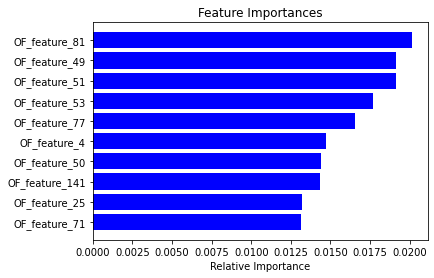

In [140]:
from matplotlib import pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train_OF, Y_train_OF)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
features = list_ego_cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [170]:
alpha = 0
Y_final =[]
for i in range(len(Y_preds_OF)):
    Y_final.append(int(alpha*Y_preds_OF[i] + (1-alpha)*Y_preds_Phy[i]))
#     Y_final.append(int(Y_preds_OF[i] and Y_preds_Phy[i] ))
print(Y_final, Y_test_OF)
f1_score(Y_test_OF, Y_final)

[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0] [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


0.2727272727272727

## Neuroticism

In [75]:
X_OF = HHI_OF_Big5_final[list_ego_cols].to_numpy()
Y_OF = HHI_OF_Big5_final['Neuroticism'].to_numpy()
X_Phy = HHI_Phy_Big5_final[list_phy_cols].to_numpy()
Y_Phy = HHI_Phy_Big5_final['Neuroticism'].to_numpy()

In [76]:
X_train_Phy, X_test_Phy, Y_train_Phy, Y_test_Phy = train_test_split(X_Phy, Y_Phy, test_size=0.13, shuffle=False)
X_train_OF, X_test_OF, Y_train_OF, Y_test_OF = train_test_split(X_OF, Y_OF, test_size=0.13, shuffle=False)

In [77]:
clf = SVC()
clf.fit(X_train_Phy, Y_train_Phy)
clf.score(X_test_Phy, Y_test_Phy)

0.3611111111111111

In [78]:
Y_preds_Phy = clf.predict(X_test_Phy)
print(classification_report(Y_test_Phy, Y_preds_Phy))
scores_Phy = cross_val_score(clf, X_Phy, Y_Phy, cv=18)
print(scores_Phy)
print(np.mean(scores_Phy))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53        24
           1       0.00      0.00      0.00        12

    accuracy                           0.36        36
   macro avg       0.26      0.27      0.27        36
weighted avg       0.35      0.36      0.35        36

[0.6875     0.5        0.625      0.6875     0.6875     0.6875
 0.73333333 0.73333333 0.86666667 0.86666667 0.86666667 0.86666667
 0.93333333 0.93333333 1.         0.8        0.26666667 0.73333333]
0.7486111111111111


[0.0472938  0.01719902 0.04342615 0.04532221 0.02113116 0.0099211
 0.0272903  0.05345931 0.12075059 0.05568855 0.01843312 0.01465714
 0.031483   0.0203926  0.0292593  0.04291991 0.01534555 0.02159578
 0.04356654 0.02652048 0.06318056 0.0120446  0.01602128 0.00822556
 0.04423384 0.04970139 0.04759006 0.0251592  0.01832747 0.00986042]


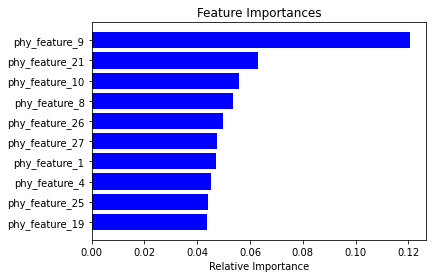

In [79]:
from matplotlib import pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train_Phy, Y_train_Phy)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
features = list_phy_cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [80]:
clf2 = SVC()
clf2.fit(X_train_OF, Y_train_OF)
clf2.score(X_test_OF, Y_test_OF)

0.6206896551724138

In [81]:
Y_preds_OF = clf2.predict(X_test_OF)
print(classification_report(Y_test_OF, Y_preds_OF))
scores_OF = cross_val_score(clf, X_OF, Y_OF, cv=18)
print(scores_OF)
print(np.mean(scores_OF))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        18
           1       0.00      0.00      0.00        11

    accuracy                           0.62        29
   macro avg       0.31      0.50      0.38        29
weighted avg       0.39      0.62      0.48        29

[0.76923077 0.84615385 0.61538462 1.         0.91666667 0.91666667
 1.         0.91666667 0.66666667 0.91666667 1.         1.
 0.75       0.91666667 0.75       0.75       0.75       0.75      ]
0.8461538461538461


/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.0069991  0.01966415 0.00625384 0.0044332  0.00035993 0.
 0.00708685 0.00907184 0.03122566 0.00395762 0.00012282 0.00065523
 0.         0.01140923 0.0072423  0.01355559 0.0053312  0.00311288
 0.00048283 0.00047298 0.00190942 0.01456657 0.00463708 0.00389379
 0.00384351 0.00025646 0.00711687 0.01336524 0.00868066 0.00104566
 0.00502133 0.00351639 0.01256344 0.00507844 0.00800923 0.00020497
 0.02714259 0.0094176  0.00983528 0.00550013 0.0031606  0.002593
 0.00418023 0.0057986  0.00522609 0.00424767 0.00601652 0.00222925
 0.00599954 0.00720438 0.01668729 0.01062764 0.00981891 0.00163981
 0.00476761 0.00336101 0.01513924 0.00664678 0.00763242 0.00137236
 0.00476177 0.00275071 0.00655106 0.00297655 0.01033071 0.00373487
 0.00522945 0.00966977 0.01619778 0.00416177 0.01351454 0.00367546
 0.01124255 0.01213972 0.01762707 0.01387459 0.00320615 0.00107901
 0.00097889 0.02921854 0.00902751 0.03381747 0.00777477 0.00342432
 0.         0.00240052 0.00679297 0.         0.         0.00052479
 0.  

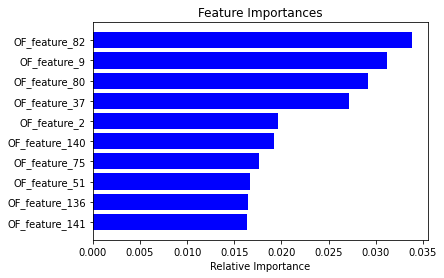

In [165]:
from matplotlib import pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train_OF, Y_train_OF)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
features = list_ego_cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [166]:
alpha = 0.1
Y_final =[]
for i in range(len(Y_preds_OF)):
    Y_final.append(int(alpha*Y_preds_OF[i] + (1-alpha)*Y_preds_Phy[i]))
#     Y_final.append(int(Y_preds_OF[i] and Y_preds_Phy[i] ))
print(Y_final, Y_test_OF)
f1_score(Y_test_OF, Y_final)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


0.0

## Acquaintance